In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,  Ridge
# 2 lines below for html export
import plotly.io as pio
pio.renderers.default ='notebook'

# 2 lines below for PDF export
!pip install Pyppeteer
!pyppeteer-install


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.2/144.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.2.3
    Uninstalling urllib3-2.2.3:
      Successfully uninstalled urllib3-2.2.3
[INFO] Starting Chromium download.
100% 183M/183M [00:02<00:00, 89.2Mb/s]
[INFO] Beginning extraction
[INFO] Chromium extracted to: /root/.local/share/pyppeteer/local-chromium/1181205


$$y = w_0x+w_1x^2+w_2x^3+w_3x^4 + w_5$$

poly_shape: (10, 9)
(1000, 9)


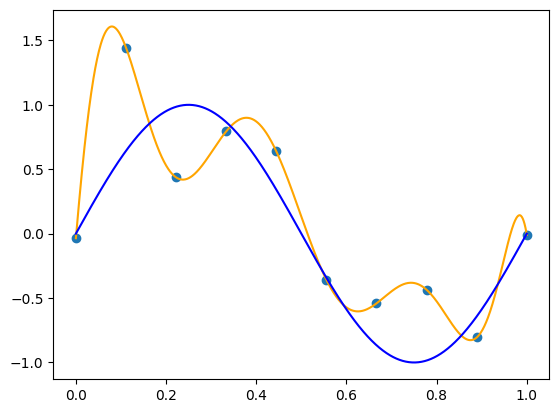

[[     40.98786714    -163.69303031   -2717.77985474   26324.37946953
   -97720.23620118  189546.00452928 -203198.20778935  114163.42149593
   -26274.85072494]]
(10, 9)


In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression,  Ridge

N=10
x = np.linspace(0,1,N)

signal = np.sin(2*math.pi*x)
noise = np.random.normal(0, 0.4, N)

data = signal + noise
data = data.reshape(-1,1)
x = x.reshape(-1,1)

M=9
poly_features = PolynomialFeatures(degree=M, include_bias=False)
x_poly= poly_features.fit_transform(x)
print(f'poly_shape: {x_poly.shape}')
model=LinearRegression()
model.fit(x_poly, data) # Fit the model

plt.scatter(x,data)
#Visualisation only
x_plot = np.linspace(0,1,1000).reshape(-1,1)
x_plot_poly = poly_features.fit_transform(x_plot)
print(x_plot_poly.shape)
plt.plot(x_plot,model.predict(x_plot_poly), color="orange")
plt.plot(x_plot, np.sin(2*math.pi*x_plot), color='blue')

plt.show()
np.set_printoptions(suppress=True)
print(model.coef_)

print(x_poly.shape)

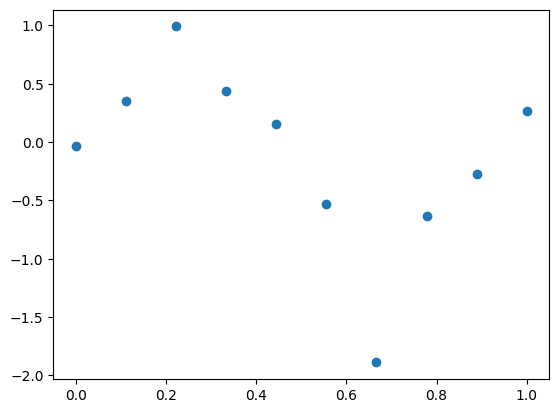

In [11]:
plt.scatter(x, data)

(10, 9)
(1000, 9)


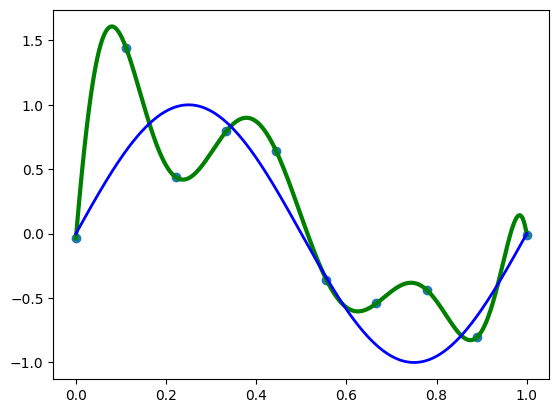

[[     40.98786714    -163.69303031   -2717.77985474   26324.37946953
   -97720.23620118  189546.00452928 -203198.20778935  114163.42149593
   -26274.85072494]]
(10, 9)


In [23]:
M=9 #Try various sizes and see the difference
poly_features = PolynomialFeatures(degree=M, include_bias=False)
x_poly= poly_features.fit_transform(x)
print(x_poly.shape)
model=LinearRegression()

model.fit(x_poly, data) # Fit the model

plt.scatter(x,data)
x_plot = np.linspace(0,1,1000).reshape(-1,1)
x_plot_poly = poly_features.fit_transform(x_plot)
print(x_plot_poly.shape)
plt.plot(x_plot,model.predict(x_plot_poly), color='green', linewidth=3)
plt.plot(x_plot, np.sin(2*math.pi*x_plot), color='blue', linewidth=2)

plt.show()
np.set_printoptions(suppress=True)
print(model.coef_)

print(x_poly.shape)

$$y=w_0x+w_1x^2+w_2x^3$$

(10, 9)
(1000, 9)


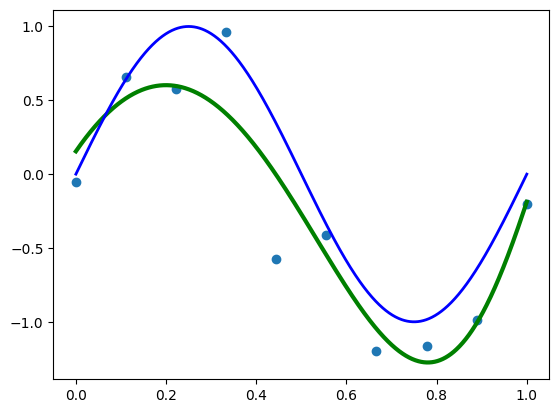

[[  4.43546042 -10.53839012  -2.92425304   2.60847402   4.28259256
    3.54078895   1.66522295  -0.58516799  -2.82648739]]
(10, 9)


In [ ]:
M=9
poly_features = PolynomialFeatures(degree=M, include_bias=False)
x_poly= poly_features.fit_transform(x)
print(x_poly.shape)
model=Ridge(alpha=0.001) #regularisation alpha =0.001
#Note the difference this has on the size of the weights and the model curve
#If you set alpha=0 you should get something very similar to the tile above


model.fit(x_poly, data) # Fit the model

plt.scatter(x,data)
x_plot = np.linspace(0,1,1000).reshape(-1,1)
x_plot_poly = poly_features.fit_transform(x_plot)
print(x_plot_poly.shape)
plt.plot(x_plot,model.predict(x_plot_poly), color='green', linewidth=3)
plt.plot(x_plot, np.sin(2*math.pi*x_plot), color='blue', linewidth=2)

plt.show()
np.set_printoptions(suppress=True)
print(model.coef_)

print(x_poly.shape)